In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [61]:
data = pd.read_csv('house_pred.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [63]:
data.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [64]:
missing_values = pd.DataFrame({"Percentage ":data.isna().sum() / len(data) * 100})
missing_values.style.background_gradient(cmap='coolwarm')

,Percentage
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


In [65]:
removed_col = ['Alley','PoolArea','Fence','MiscFeature']
data.drop(columns=removed_col,inplace=True)

In [66]:
print(f"New Modified Features :{data.shape[1]}")

New Modified Features :77


In [67]:
mis_col = data.columns[data.isna().any()]
mis_col


Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC'],
      dtype='object')

In [68]:
mis_features_dtype = data.dtypes[mis_col]
mis_features_dtype

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
dtype: object

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

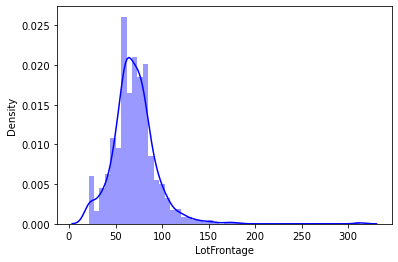

In [69]:
sns.distplot(data['LotFrontage'],color='b')

In [70]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['LotFrontage'].isna().any()

False

In [71]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['MasVnrArea'].isna().any()

False

In [72]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())
data['GarageYrBlt'].isna().any()

False

In [73]:
data['Electrical'].fillna(data['Electrical'].value_counts().index[0],inplace=True)
data['Electrical'].isna().any()

False

In [74]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [75]:
data['GarageType'].fillna(data['GarageType'].value_counts().index[0],inplace=True)
data['GarageFinish'].fillna(data['GarageFinish'].value_counts().index[0],inplace=True)
data['GarageQual'].fillna(data['GarageQual'].value_counts().index[0],inplace=True)
data['GarageCond'].fillna(data['GarageCond'].value_counts().index[0],inplace=True)

In [76]:
data['MasVnrType'].fillna(data['MasVnrType'].value_counts().index[0],inplace=True)
data['FireplaceQu'].fillna(data['FireplaceQu'].value_counts().index[0],inplace=True)
data['PoolQC'].fillna(data['PoolQC'].value_counts().index[0],inplace=True)

In [77]:
data.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 77, dtype: bool

In [78]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


In [79]:
data.describe(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,7,5,6,3,5,5,3,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1360,1070,951,686,1392,1407,1340,1456,1267,1198


In [80]:
categorical_features = list(data.select_dtypes(include='object').columns)
numerical_features = list(data.select_dtypes(exclude='object').columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'SaleType',
 'SaleCondition']

In [81]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

<AxesSubplot:>

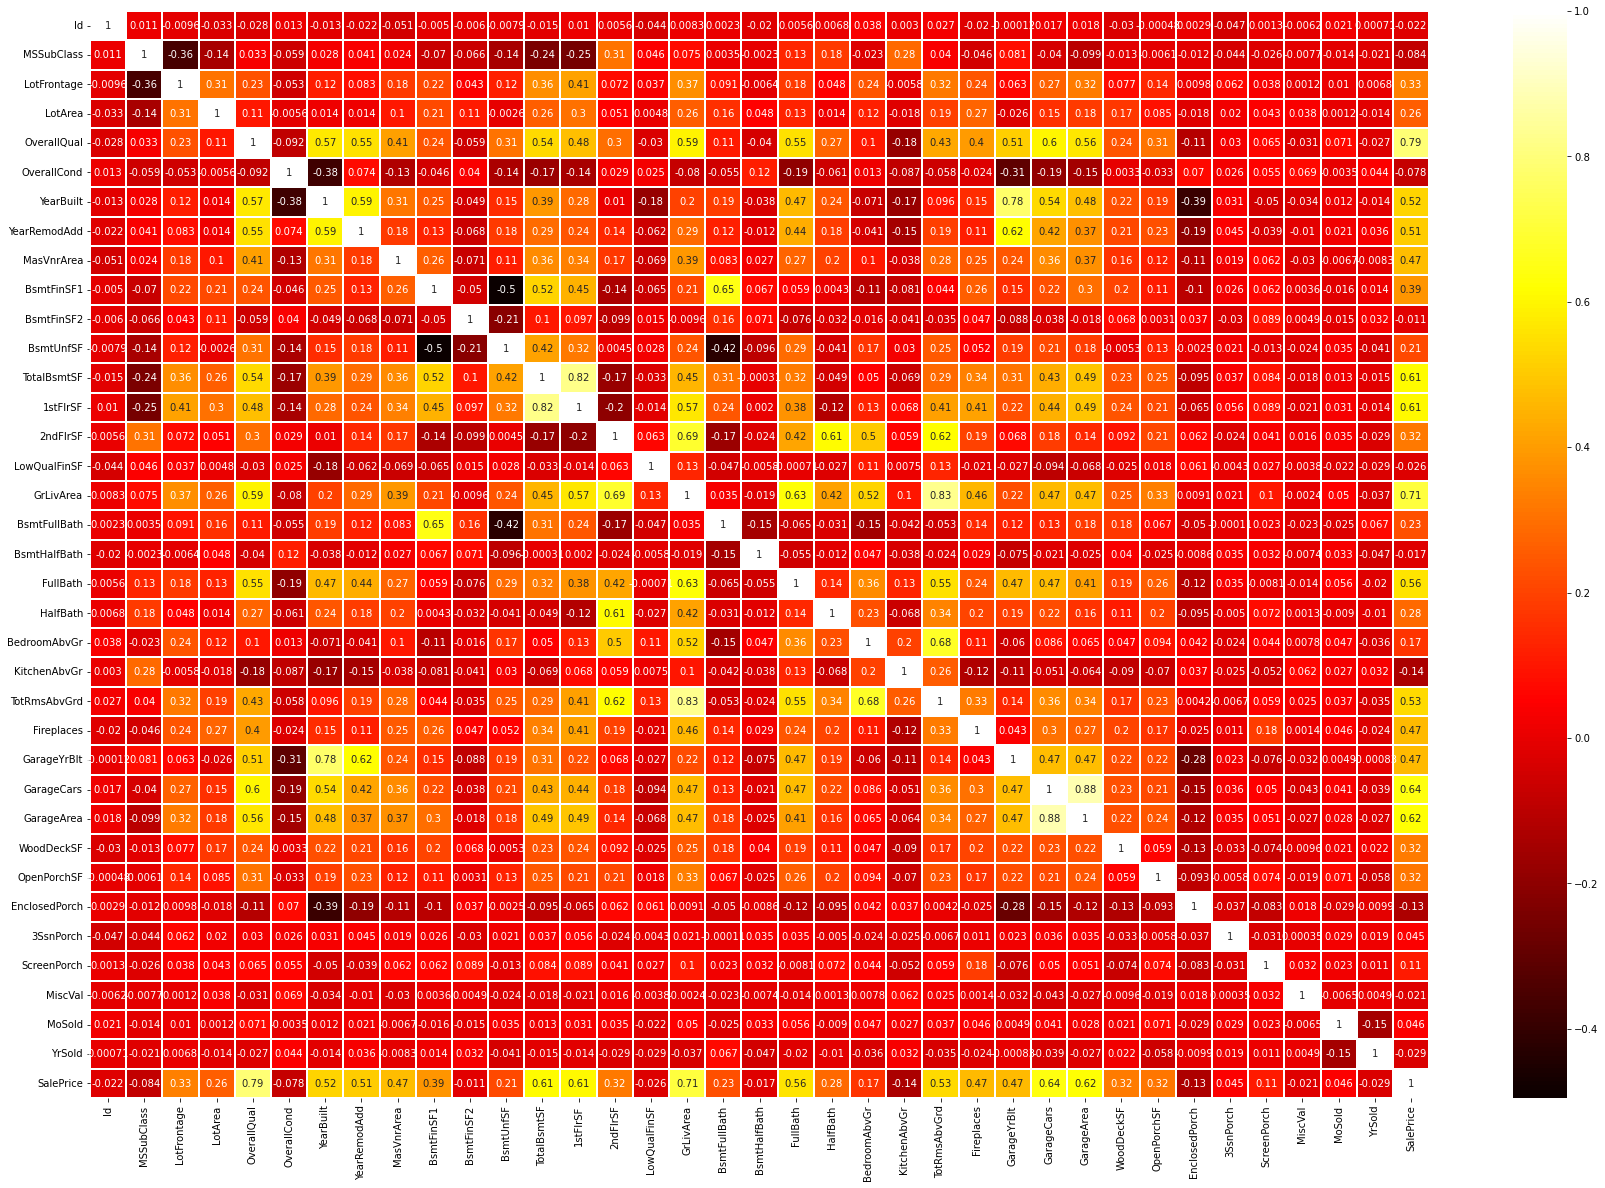

In [82]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,cmap='hot')

In [83]:
target_corr = data.corr()['SalePrice'].sort_values(ascending=False)[1:]
target_corr

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

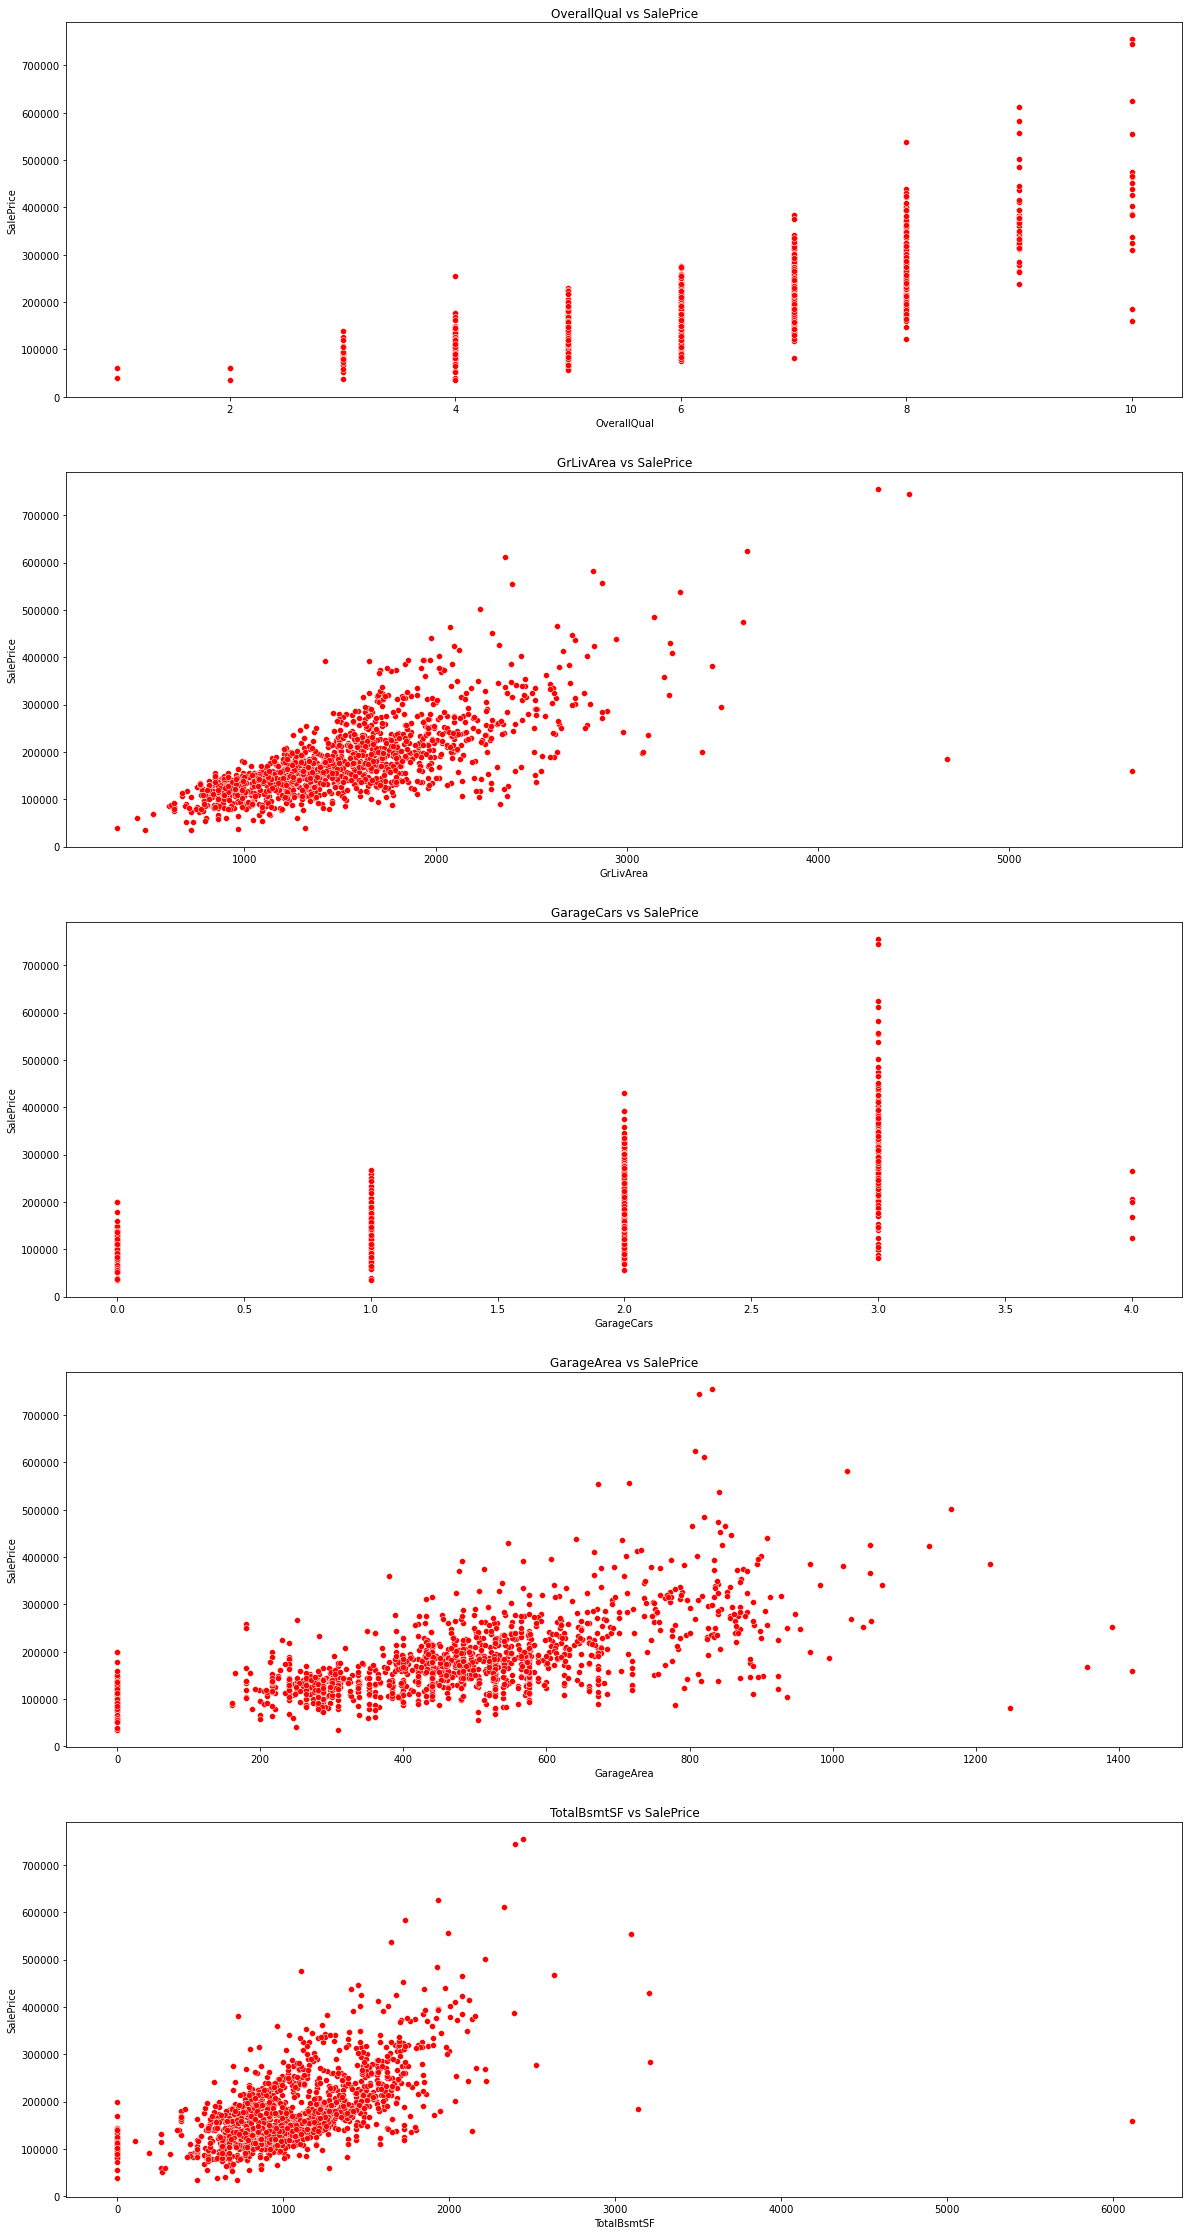

In [84]:
target_corr = target_corr[:5]
fig,ax = plt.subplots(nrows = len(target_corr),ncols = 1, figsize = (20,40))
for i,col in enumerate(target_corr.index):    
    sns.scatterplot(x = col, y = "SalePrice", data = data, ax = ax[i], color = 'r')
    ax[i].set_title(f'{col} vs SalePrice')

In [85]:
box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

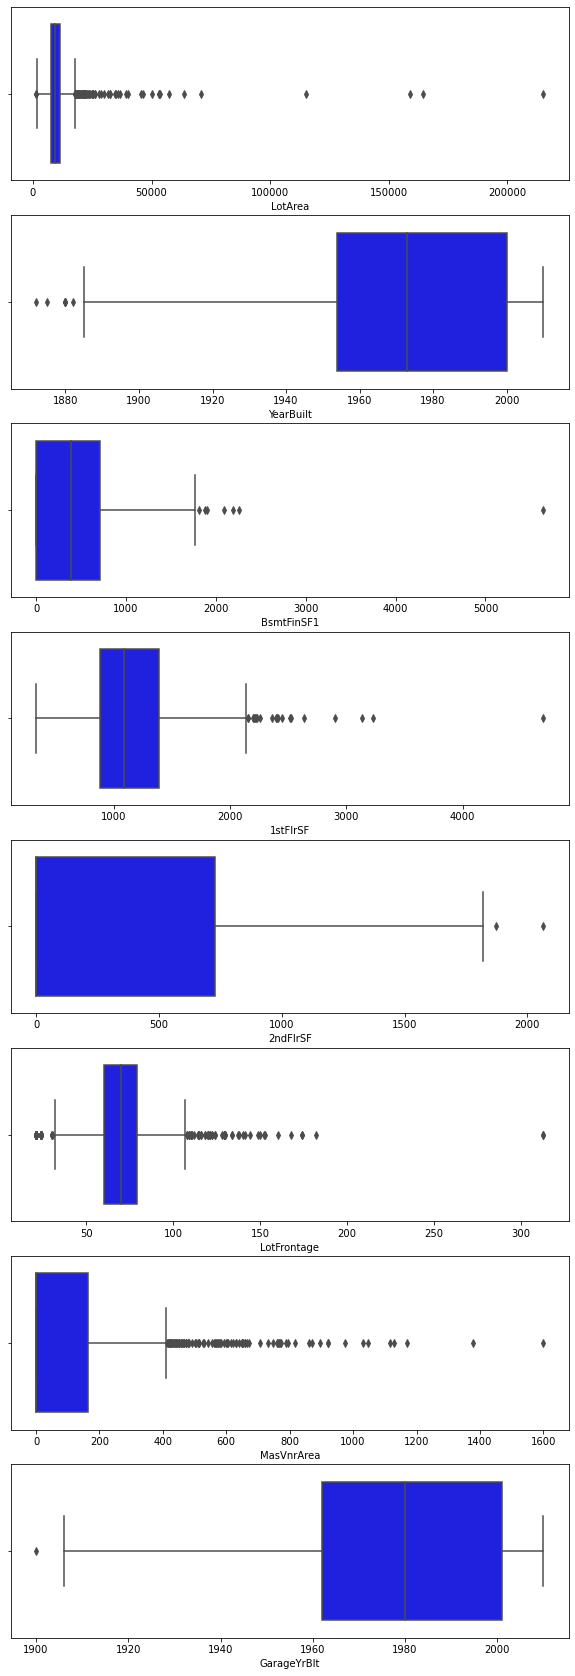

In [86]:
plt.figure(figsize=(10,30))
p_number=1
for c in box:
    ax=plt.subplot(8,1,p_number)
    sns.boxplot(data[c],color='blue')
    p_number=p_number + 1 
plt.show()

In [87]:
def IQR(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    return iqr,q1,q3

In [88]:
col = box.columns
for i in col:
    iqr, q1, q3 = IQR(data,i)
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[(data[i] > lower) & (data[i] < upper)]

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

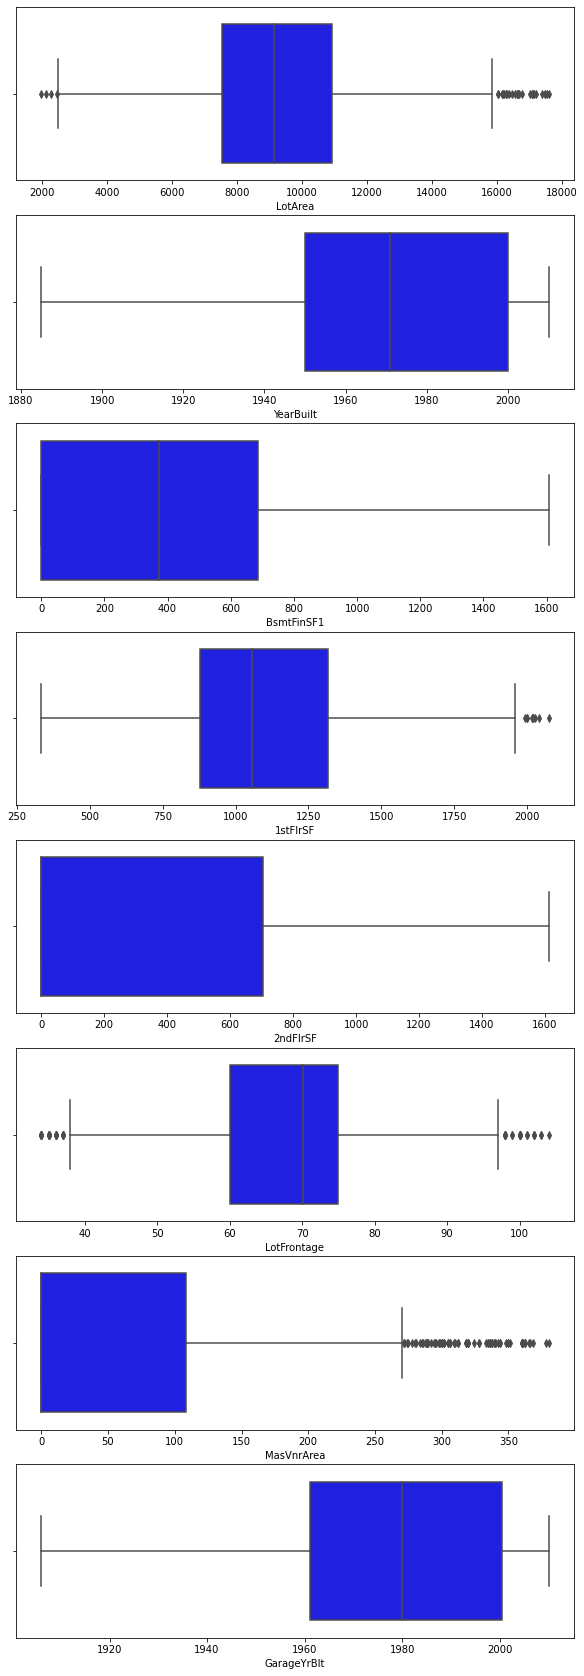

In [89]:
plt.figure(figsize=(10,30))
p_number=1
for c in box:
    ax=plt.subplot(8,1,p_number)
    sns.boxplot(data[c],color='blue')
    p_number=p_number + 1 
plt.show()

In [90]:
df = data.copy()

In [91]:
df2 = data[df.corr().loc["SalePrice"][abs(df.corr().loc["SalePrice"])>0.25].index]

In [92]:
df2.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [93]:
df2['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1187, dtype: int64

In [94]:
x = df2.drop(['SalePrice'],axis=1).values
y = df2['SalePrice'].values

In [95]:
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=112)

In [97]:
print(f"Shape of Training Set : {x_train.shape}")
print(f"Shape of Testing Set : {x_test.shape}")

Shape of Training Set : (949, 20)
Shape of Testing Set : (238, 20)


In [98]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [99]:
LR.score(x_test,y_test)

0.866858708782965

In [100]:
y_pred

array([172753.54746043, 227902.31573534, 143239.1560016 , 177833.64666242,
       189439.79958803, 102577.06149317, 122322.65693103, 174954.61538412,
       225556.04337185, 323989.85880988, 146314.2612691 , 172764.12101544,
       183175.91022699, 220648.16066209, 166654.23737447, 229296.86893139,
       135286.75240587, 230469.30277367, 143840.71880335, 163235.86624033,
       112729.41294355, 195912.51517101, 209333.24451621, 112337.47364771,
       131408.14421121, 305447.07608709, 193360.29544295, 164513.70285111,
        91834.41870606,  77937.91615897, 126748.18749896,  64697.88334507,
       122225.09802628, 150732.49589646, 111740.81788749, 102042.44319082,
       158852.84360386, 106090.66994807, 202226.55788558, 278524.51669091,
        70572.66142271, 249765.72197785, 248606.09867689, 250850.8851306 ,
        34833.72067731, 191032.98393275, 159783.11560802, 160505.04719521,
       256806.38395729, 223599.73494958, 249063.21039634, 122203.64270409,
       118826.97324687, 2

In [101]:
test_sc=r2_score(y_test,y_pred)
print('Linear Regression r2_score for testing is',test_sc)

Linear Regression r2_score for testing is 0.866858708782965


In [102]:
mean_absolute_percentage_error(y_test,y_pred)*100

10.562896998417381

In [103]:
mean_absolute_error(y_test,y_pred)

16315.749773689739

In [104]:
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits=10)

cross_val_score(LR,x,y,cv=kf).mean()

0.8486557837377984

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor()

model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)

mean_absolute_error(y_test,y_pred2),r2_score(y_test,y_pred2)

(13939.491089318126, 0.8815684324352825)

In [106]:
cross_val_score(model2,x,y,cv=kf).mean()

0.8793458011346551

In [108]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1,1206,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1207,20,RH,NaN,8900,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal
3,1208,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
4,1209,20,RL,70.0,7763,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal


In [109]:
train_col = list(df2.columns)
train_col.remove('SalePrice')
train_col

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [110]:
test_data = test_data[train_col]
test_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,78.0,10140,5,1975,1975,0.0,788,1056,1074,0,1074,1,1,6,0,1975.0,2,495,0,88
1,90.0,14684,7,1990,1991,234.0,485,2158,2196,0,2196,2,0,7,1,1990.0,3,701,84,70
2,NaN,8900,4,1966,1966,0.0,1056,1056,1056,0,1056,1,0,5,0,1966.0,1,384,0,42
3,70.0,9135,6,2003,2003,120.0,340,1682,1700,0,1700,2,0,7,0,2003.0,2,544,192,23
4,70.0,7763,5,1962,1980,0.0,504,931,1283,0,1283,1,0,6,0,1980.0,2,506,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,62.0,7917,6,1999,2000,0.0,0,953,953,694,1647,2,1,7,1,1999.0,2,460,0,40
252,85.0,13175,6,1978,1988,119.0,790,1542,2073,0,2073,2,0,7,2,1978.0,2,500,349,0
253,66.0,9042,7,1941,2006,0.0,275,1152,1188,1152,2340,2,0,9,2,1941.0,1,252,0,60
254,68.0,9717,5,1950,1996,0.0,49,1078,1078,0,1078,1,0,5,0,1950.0,1,240,366,0


In [111]:
test_data.isna().any()

LotFrontage      True
LotArea         False
OverallQual     False
YearBuilt       False
YearRemodAdd    False
MasVnrArea       True
BsmtFinSF1      False
TotalBsmtSF     False
1stFlrSF        False
2ndFlrSF        False
GrLivArea       False
FullBath        False
HalfBath        False
TotRmsAbvGrd    False
Fireplaces      False
GarageYrBlt      True
GarageCars      False
GarageArea      False
WoodDeckSF      False
OpenPorchSF     False
dtype: bool

In [112]:
test_data['LotFrontage'].fillna(test_data.LotFrontage.median(),inplace=True)
test_data['MasVnrArea'].fillna(test_data.MasVnrArea.median(),inplace=True)
test_data['GarageYrBlt'].fillna(test_data.GarageYrBlt.median(),inplace=True)

In [113]:
col_test_data = test_data.select_dtypes(exclude='object').columns

In [114]:
tX = test_data.iloc[:,:].values
scaler = MinMaxScaler()
tX = scaler.fit_transform(tX)

out = pd.DataFrame(model2.predict(tX))

out.index = np.arange(1205,1461)
out.columns = ['SalePrice']
out

,SalePrice
1205,36721.077351
1206,37868.193550
1207,36721.077351
1208,37868.193550
1209,36721.077351
...,...
1456,37868.193550
1457,48016.020740
1458,48016.020740
1459,36721.077351


In [115]:
out.to_csv('Output1.csv')